# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


# YOUR CODE HERE
df = pd.read_csv(airbnbDataSet_filename, header = 0)


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Data Set : Airbnb 
Prediction : Based on the description, I want a NLP, to look at the description and predit the price of the listing. The label will be the price column
This is a supervised learning problem, since we are using description as a input and price as the label. It's a regression problem since we are predicting numbers. 
My features are "description".
This machine learning problem can help with price optimization, it can help give the host a idea of pricing based on the how the host describes it. This could also help with fake listings, some people lie about the description.

-----



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

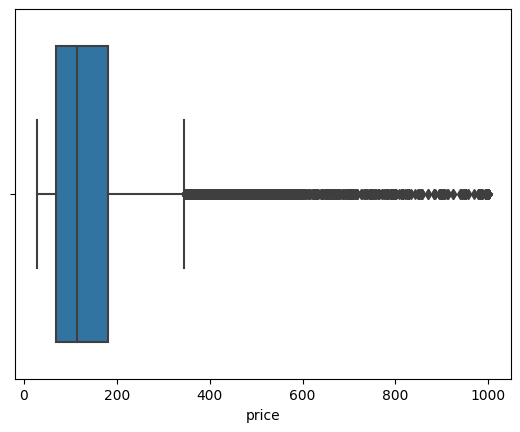

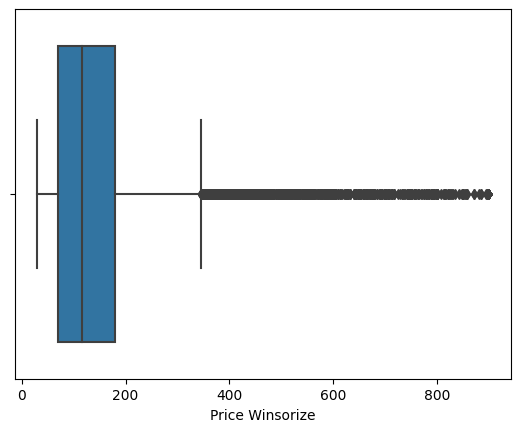

<AxesSubplot: xlabel='price_win', ylabel='Count'>

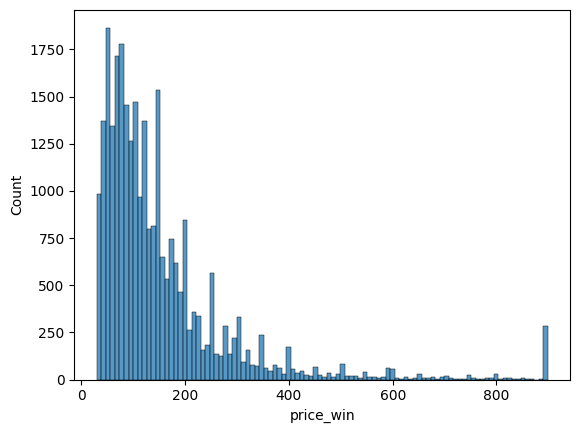

In [3]:
print(df.columns)

print(df['description'])
df['description'].isnull().sum() #570 is null

print(df['price'])

print(df['price'].describe())
df.dtypes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats

sns.boxplot(x=df['price'])
plt.show()

df['price_win'] = mstats.winsorize(df['price'], limits = [0.01,0.01])
sns.boxplot(x=df['price_win'])
plt.xlabel('Price Winsorize')
plt.show()

sns.histplot(df['price_win'],bins = 100)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

My feature list will have description as the main feature. If I wanted to expand more on this, I could add bathrooms, bedrooms, beds, accommodates to see how the model will predict the price with these other features. As for the features I want to remove host_name, host_location, host_about, minimum_nights, maximum_nights and more. I mainly want to focus on the description. For nulls descriptions, I will add " ", so we don't miss any listing. Eventually, I can build on this model with more features, so I don't want to miss on the 570 listings. For the outliers, I will use winsorizing for the prices, capping at 1% from bottom and the top. 
I will follow a neural network model. Similar with what we did for Unit 8. I will be using TF-IDF vectorization to transform the features. 
I want to make sure my descriptions have something, so if there's a NA, I will put "" in it's place. As for prices, I want to make sure that they aren't empty as well. I will split the data, so I can practice how the model will act with new data. Then vectorize the text, making sure that it's all lowercase, I noticed that there was a a review with all caps, so it will affect how the model works. I will be using mean absolute error and root mean squared error. Also I want the model to be careful of the stop words, using words such as "the" has no meaning.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow.keras as keras
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

2025-07-30 03:45:37.211480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-30 03:45:37.211510: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [5]:

df['description'] = df['description'].fillna("")
df = df.dropna(subset = ['price'])
df['price'] = df['price'].astype('float64')

#outliers
q_low, q_high = df['price'].quantile([0.01, 0.99])
df['price_wins'] = df['price'].clip(lower=q_low, upper=q_high)

df = df.dropna(subset= ['price_wins'])

X = df['description'] #feature
y = df['price_wins'] #label


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

tfidf_vectorizer = TfidfVectorizer(
    lowercase = True,
    stop_words = 'english',
    min_df = 10,
    max_df = 0.9,
    max_features = 2000
)
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size) 




2000


In [6]:
#model
model = keras.Sequential()
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
model.add(input_layer)

hidden_layer_0 = keras.layers.Dense(units=128, activation='relu')
model.add(hidden_layer_0)
#model.add(keras.layers.Dropout(.1))

hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
model.add(hidden_layer_1)
model.add(keras.layers.Dropout(.1))

hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
model.add(hidden_layer_2)
#model.add(keras.layers.Dropout(.1))

hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
model.add(hidden_layer_3)
#model.add(keras.layers.Dropout(.1))

output_layer = keras.layers.Dense(units=1)
model.add(output_layer)

model.summary()

ADAMoptimizer = keras.optimizers.Adam(learning_rate=0.01) #Asked ChatGPT since SGD wasn't working and give me the same results
loss_function = keras.losses.MeanSquaredError()
model.compile(optimizer= ADAMoptimizer, loss= loss_function , metrics=['mse'])

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

t0 = time.time() # start time
num_epochs = 40 #epochs

history = model.fit(
    X_train_tfidf.toarray(),
    y_train,
    batch_size = 16,
    epochs=num_epochs,
    verbose=1, 
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=1)],
)
t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256128    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 267,009
Trainable params: 267,009
Non-trainable params: 0
__________________________________________________

2025-07-30 03:45:41.561865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-30 03:45:41.561891: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-30 03:45:41.561908: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0aaacc28f92bebc85): /proc/driver/nvidia/version does not exist
2025-07-30 03:45:41.562092: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-30 03:45:42.108812: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the

Epoch 1/40
1121/1121 [==============================] - 2s 1ms/step - loss: 12385.9365 - mse: 12385.9365 - val_loss: 10887.5986 - val_mse: 10887.5986
Epoch [1/ 40], Loss: 12385.9365, Mse: 12385.9365, Val_loss: 10887.5986, Val_mse: 10887.5986
Epoch 2/40
1121/1121 [==============================] - 1s 1ms/step - loss: 9068.4219 - mse: 9068.4219 - val_loss: 11011.7588 - val_mse: 11011.7588
Epoch [2/ 40], Loss: 9068.4219, Mse: 9068.4219, Val_loss: 11011.7588, Val_mse: 11011.7588
Epoch 3/40
1121/1121 [==============================] - 1s 1ms/step - loss: 7308.7993 - mse: 7308.7993 - val_loss: 11213.6426 - val_mse: 11213.6426
Epoch [3/ 40], Loss: 7308.7993, Mse: 7308.7993, Val_loss: 11213.6426, Val_mse: 11213.6426
Epoch 4/40
1121/1121 [==============================] - 1s 1ms/step - loss: 5991.5605 - mse: 5991.5605 - val_loss: 11678.6240 - val_mse: 11678.6240
Epoch [4/ 40], Loss: 5991.5605, Mse: 5991.5605, Val_loss: 11678.6240, Val_mse: 11678.6240
Epoch 5/40
1121/1121 [======================

In [7]:

#predict
nn_y_prediction = model.predict(X_test_tfidf.toarray())

mae_nn  = mean_absolute_error(y_test, nn_y_prediction)
rmse_nn = mean_squared_error(y_test, nn_y_prediction, squared=False)

print("Neural MAE:  $%.2f" % mae_nn)
print("Neural RMSE: $%.2f" % rmse_nn)

for i in range(0,20):
    prediction_price = nn_y_prediction[i]
    real_price = y_test.to_numpy()[i]
    error = prediction_price - real_price
    print("Predicted = $%.2f" % prediction_price, "Actual $%.2f" % real_price , "Error $%.2f" % error)



Neural MAE:  $61.30
Neural RMSE: $105.04
Predicted = $254.52 Actual $385.00 Error $-130.48
Predicted = $119.10 Actual $40.00 Error $79.10
Predicted = $108.97 Actual $120.00 Error $-11.03
Predicted = $240.98 Actual $113.00 Error $127.98
Predicted = $137.67 Actual $80.00 Error $57.67
Predicted = $48.10 Actual $82.00 Error $-33.90
Predicted = $124.53 Actual $168.00 Error $-43.47
Predicted = $181.21 Actual $45.00 Error $136.21
Predicted = $128.26 Actual $58.00 Error $70.26
Predicted = $170.09 Actual $170.00 Error $0.09
Predicted = $307.88 Actual $400.00 Error $-92.12
Predicted = $128.26 Actual $250.00 Error $-121.74
Predicted = $49.10 Actual $100.00 Error $-50.90
Predicted = $54.31 Actual $250.00 Error $-195.69
Predicted = $144.98 Actual $75.00 Error $69.98
Predicted = $104.80 Actual $60.00 Error $44.80
Predicted = $44.69 Actual $180.00 Error $-135.31
Predicted = $106.29 Actual $150.00 Error $-43.71
Predicted = $335.86 Actual $898.37 Error $-562.51
Predicted = $375.55 Actual $279.00 Error 

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
lr = LinearRegression()
lr.fit(X_train_tfidf, y_train)

lr_y_prediction = lr.predict(X_test_tfidf.toarray())

mae_lr  = mean_absolute_error(y_test, lr_y_prediction)
rmse_lr = mean_squared_error(y_test, lr_y_prediction, squared=False)

print("LinearRegression MAE:  $%.2f" % mae_lr)
print("LinearRegression RMSE: $%.2f" % rmse_lr)

for i in range(20):
    prediction_price = lr_y_prediction[i]
    real_price = y_test.to_numpy()[i]
    error = prediction_price - real_price
    print("Predicted = $%.2f" % prediction_price, "Actual $%.2f" % real_price , "Error $%.2f" % error)


LinearRegression MAE:  $69.40
LinearRegression RMSE: $109.23
Predicted = $268.71 Actual $385.00 Error $-116.29
Predicted = $131.17 Actual $40.00 Error $91.17
Predicted = $147.85 Actual $120.00 Error $27.85
Predicted = $210.13 Actual $113.00 Error $97.13
Predicted = $191.24 Actual $80.00 Error $111.24
Predicted = $93.32 Actual $82.00 Error $11.32
Predicted = $177.27 Actual $168.00 Error $9.27
Predicted = $126.34 Actual $45.00 Error $81.34
Predicted = $135.17 Actual $58.00 Error $77.17
Predicted = $178.72 Actual $170.00 Error $8.72
Predicted = $264.32 Actual $400.00 Error $-135.68
Predicted = $135.17 Actual $250.00 Error $-114.83
Predicted = $67.36 Actual $100.00 Error $-32.64
Predicted = $73.07 Actual $250.00 Error $-176.93
Predicted = $142.10 Actual $75.00 Error $67.10
Predicted = $116.53 Actual $60.00 Error $56.53
Predicted = $-31.05 Actual $180.00 Error $-211.05
Predicted = $91.07 Actual $150.00 Error $-58.93
Predicted = $216.63 Actual $898.37 Error $-681.74
Predicted = $405.10 Actua

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


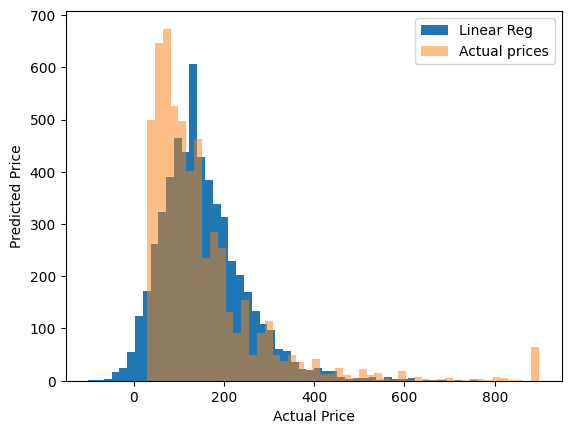

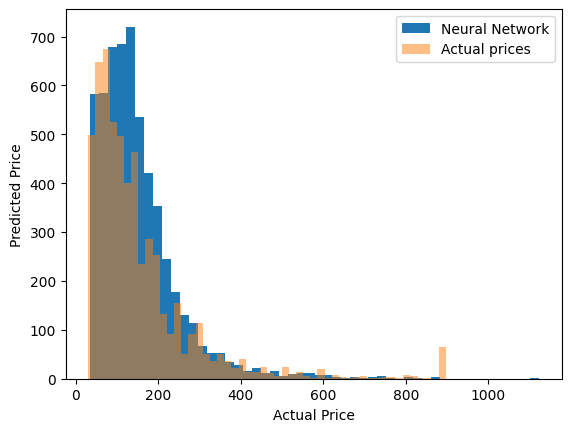

In [9]:
#Compare
plt.figure()
plt.hist(lr_y_prediction, bins = 50, label = "Linear Reg")
plt.hist(y_test,bins=50, alpha=0.5, label='Actual prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


plt.figure()
plt.hist(nn_y_prediction, bins = 50, label = "Neural Network")
plt.hist(y_test, bins=50, alpha=0.5, label='Actual prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


In the end, I would like to try to expand this project with using the number of rooms the listing has. I also want to check out if the price will be affected if the listing has more accommodations. 